In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import project1 as pj
from sklearn.preprocessing import StandardScaler


In [2]:
def plot_bar_perform(perform, x_label, x_name=None, y_label=None, y_name=None, bar_label=None, y_range1=None, y_range2=None, x_range1=None, x_range2=None, width=None, odd=None, round_to=None, leg_loc=None, two_bar=None):
    location = np.arange(len(x_label))
    if width == None:
        width = 0.3
    if odd == True:
        offset = width
    elif two_bar == True:
        offset = 0.5*width
    else:
        offset = 1.5*width
    if round_to == None:
        round_to = 3
    fig, ax = plt.subplots(layout='constrained')
    if x_range1 != None:
        fig.set_size_inches(x_range1, x_range2)
    for i, label in enumerate(bar_label):
        measurement = [round(perform[j][i], round_to) for j in range(len(perform))]
        ax.bar(location + i * width, measurement, width, label=None)
        rects = ax.bar(location + i * width, measurement, width, label=label)
        ax.bar_label(rects, padding=3)
    ax.set_ylabel(f'{y_label}')
    ax.set_title(f'{y_name} vs. {x_name}')
    ax.set_xticks(location+offset, x_label)
    if leg_loc == None:
        leg_loc = 'upper left'
    ax.legend(loc=leg_loc, ncols=3)
    ax.set_ylim(y_range1, y_range2)

    plt.show()

def plot_curve_perform(x_values, perform, x_label, y_label, x_name, y_range1=None, y_range2=None, x_range1=None, x_range2=None):
    fig, ax = plt.subplots(layout='constrained')
    if x_range1 != None:
        fig.set_size_inches(x_range1, x_range2)
    ax.plot(x_values, perform, marker='o', linestyle='-', color='b', label=f'{y_label}')
    for i, value in enumerate(perform):
        ax.text(x_values[i], value, round(value, 3), ha='center', va='bottom')
    plt.xscale('log')
    plt.ylabel(f'{y_label}')
    plt.xlabel(f'{x_name}')
    plt.title(f'{y_label} vs. {x_name}')
    plt.xticks(x_values, x_label)
    plt.ylim(y_range1,y_range2)
    plt.grid(True) 
    plt.legend()
    plt.show()

# **Linear Regression**

In [3]:
# Fetch dataset 1
infrared_thermography_temperature = fetch_ucirepo(id=925)
# Data (as pandas DataFrames) 
X = infrared_thermography_temperature.data.features 
y = infrared_thermography_temperature.data.targets 
y = y['aveOralM']

data = pd.concat([X, y], axis=1)
summary_statistics = data.describe().T[['mean', 'std', 'min', 'max']]

# 1. Handle categorical features
categorical_columns= []
for column in X.columns:
    if X[column].dtype == 'object':
        categorical_columns.append(column)
X_encoded = pd.get_dummies(X, categorical_columns, drop_first=True)
feature_names = X_encoded.columns # save feature names for future use
# 2. Handling missing values
X_encoded.fillna(X_encoded.mean(), inplace=True)  
# 3. scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
y = y.to_numpy()

# print(summary_statistics)

## *Change Momentum*

* **momentum = 0**

In [4]:
x_train, x_test, y_train, y_test = pj.split_train_test_data(X_scaled, y, train_ratio=0.8, random_state=42)
split_ratio = [80]
batch_sizes = [16]
# miniBatchSGD
linear_model1 = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0,
    use_miniBatch=True,
    with_bias=True,
    epsilon=1e-7, 
    satisfied_stability=1e6
)
linear_model1.fit(x_train, y_train, batch_size=16)

tr_mse_sr1, tst_mse_sr1, tr_r2_sr1, tr_mae_sr1, tst_r2_sr1, tst_mae_sr1, grad_norm_histLR_sr1 = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model1, batch_sizes, linear=True)


Mini-batch SGD completed in 1.314 seconds.
Iterations: 102000, Batch size: 16
Mini-batch SGD completed in 1.338 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.1933, R2: 0.7797 
Test set:
MAE: 0.2059, R2: 0.6532


* **momentum = 0.3**

In [5]:
# miniBatchSGD
linear_model2 = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=True,
    with_bias=True,
    epsilon=1e-7, 
    satisfied_stability=1e6
)
linear_model2.fit(x_train, y_train, batch_size=16)

tr_mse_sr2, tst_mse_sr2, tr_r2_sr2, tr_mae_sr2, tst_r2_sr2, tst_mae_sr2, grad_norm_histLR_sr2 = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model2, batch_sizes, linear=True)

Mini-batch SGD completed in 1.308 seconds.
Iterations: 102000, Batch size: 16
Mini-batch SGD completed in 1.318 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.1932, R2: 0.7796 
Test set:
MAE: 0.2055, R2: 0.6539


In [6]:
# miniBatchSGD
linear_model05 = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=True,
    with_bias=True,
    epsilon=1e-7, 
    satisfied_stability=1e6
)
linear_model05.fit(x_train, y_train, batch_size=16)

tr_mse_sr05, tst_mse_sr05, tr_r2_sr05, tr_mae_sr05, tst_r2_sr05, tst_mae_sr05, grad_norm_histLR_sr05 = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model05, batch_sizes, linear=True)

Mini-batch SGD completed in 1.305 seconds.
Iterations: 102000, Batch size: 16
Mini-batch SGD completed in 1.314 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.1929, R2: 0.7793 
Test set:
MAE: 0.2047, R2: 0.6551


* **momentum = 0.9**

In [7]:
# miniBatchSGD
linear_model3 = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.9,
    use_miniBatch=True,
    with_bias=True,
    epsilon=1e-7, 
    satisfied_stability=1e6
)
linear_model3.fit(x_train, y_train, batch_size=16)

tr_mse_sr3, tst_mse_sr3, tr_r2_sr3, tr_mae_sr3, tst_r2_sr3, tst_mae_sr3, grad_norm_histLR_sr3 = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model3, batch_sizes, linear=True)

Mini-batch SGD completed in 1.304 seconds.
Iterations: 102000, Batch size: 16
Mini-batch SGD completed in 1.321 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.1928, R2: 0.7744 
Test set:
MAE: 0.2012, R2: 0.6565


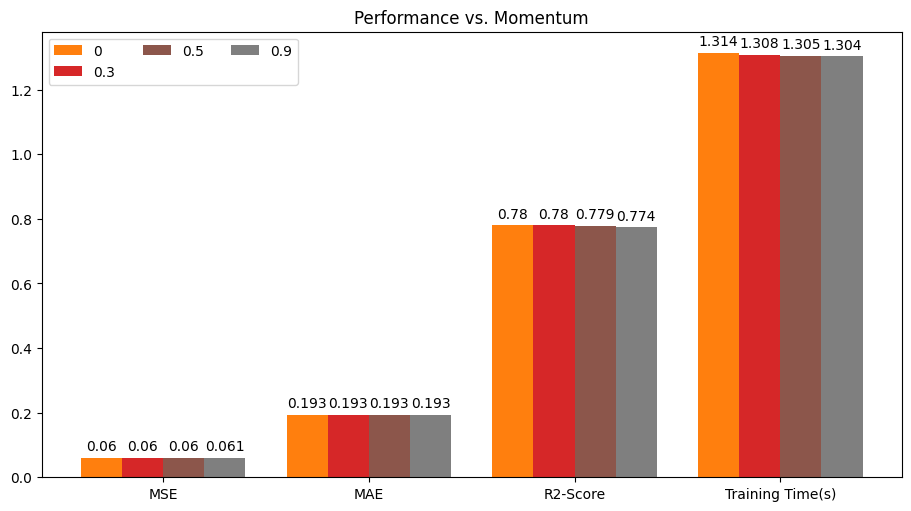

In [8]:
mse_mtm = [tr_mse_sr1[0], tr_mse_sr2[0], tr_mse_sr05[0], tr_mse_sr3[0]]
mae_mtm = [tr_mae_sr1[0], tr_mae_sr2[0], tr_mae_sr05[0], tr_mae_sr3[0]]
r2_mtm = [tr_r2_sr1[0], tr_r2_sr2[0], tr_r2_sr05[0], tr_r2_sr3[0]]
time_mtm = [linear_model1.time_hist[0], linear_model2.time_hist[0], linear_model05.time_hist[0], linear_model3.time_hist[0]]

momentums = [0, 0.5, 0.9]
perform = [mse_mtm, mae_mtm, r2_mtm, time_mtm]
x_label = ["MSE", "MAE", "R2-Score", "Training Time(s)"]
x_name = "Momentum"
y_name = 'Performance'
bar_label = ["0", "0.3", "0.5", "0.9"]

plot_bar_perform(perform, x_label, x_name, "", y_name, bar_label, width=0.2, x_range1=9, x_range2=5, odd=False)



## *Learning Rate vs. Traing Time*

In [31]:
# miniBatchSGD
linear_model_lr2 = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1e-3,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=True,
    with_bias=True
)

split_ratio = [80]
batch_sizes = [16]
linear_model_lr2.time_hist.clear()
tr_mse_lr2, tst_mse_lr2, tr_r2_lr2, tr_mae_lr2, tst_r2_lr2, tst_mae_lr2, grad_norm_histLR_lr2 = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model_lr2, batch_sizes, linear=True)

Mini-batch SGD completed in 1.331 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.1940, R2: 0.7788 
Test set:
MAE: 0.2063, R2: 0.6517


In [20]:
# miniBatchSGD
linear_model_lr3 = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=True,
    with_bias=True
)

split_ratio = [80]
batch_sizes = [16]
linear_model_lr3.time_hist.clear()
tr_mse_lr3, tst_mse_lr3, tr_r2_lr3, tr_mae_lr3, tst_r2_lr3, tst_mae_lr3, grad_norm_histLR_lr3 = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model_lr3, batch_sizes, linear=True)

Mini-batch SGD completed in 1.328 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.1932, R2: 0.7796 
Test set:
MAE: 0.2055, R2: 0.6539


In [41]:
# miniBatchSGD
linear_model_lr4 = pj.LinearRegreassion(
    num_epochs=2000,
    lr=2e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=True,
    with_bias=True
)

split_ratio = [80]
batch_sizes = [16]
linear_model_lr4.time_hist.clear()
tr_mse_lr4, tst_mse_lr4, tr_r2_lr4, tr_mae_lr4, tst_r2_lr4, tst_mae_lr4, grad_norm_histLR_lr4 = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model_lr4, batch_sizes, linear=True)

Mini-batch SGD completed in 1.326 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.1945, R2: 0.7787 
Test set:
MAE: 0.2099, R2: 0.6475


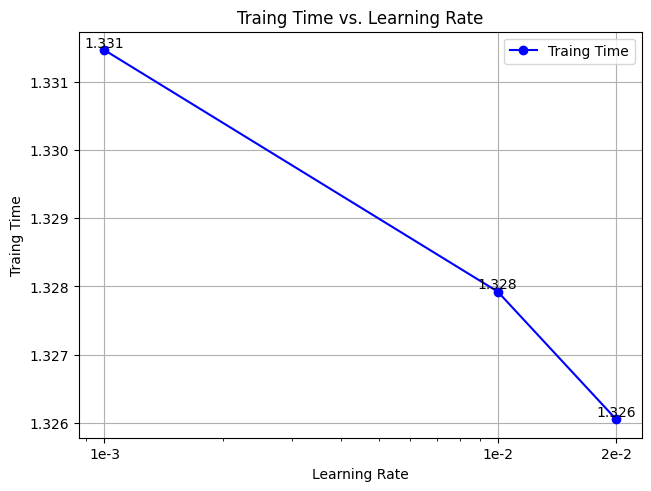

In [42]:
lr = ["1e-3","1e-2", "2e-2"]
lr_value = [1e-3, 1e-2, 2e-2]
x_name = 'Learning Rate'
time_lr = [linear_model_lr2.time_hist[0], linear_model_lr3.time_hist[0], linear_model_lr4.time_hist[0]]
plot_curve_perform(lr_value, time_lr, lr, 'Traing Time', x_name)


---

# **Logistic Regression**

In [3]:
# Fetch dataset 2
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
# data (as pandas dataframes) 
X_log = cdc_diabetes_health_indicators.data.features 
y_log = cdc_diabetes_health_indicators.data.targets 
y_log = y_log['Diabetes_binary']


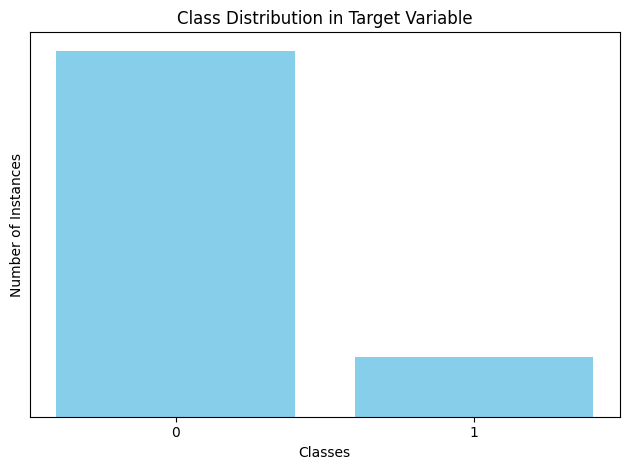

In [4]:
data = pd.concat([X_log, y_log], axis=1)
summary_statistics = data.describe().T[['mean', 'std', 'min', 'max']]
unique_classes = np.unique(y_log)
num_classes = len(unique_classes)
# print(summary_statistics, '\n')
# print(f"Unique classes in the target variable: {unique_classes}")
# print(f"Number of classes: {num_classes}")
unique_classes, class_counts = np.unique(y_log, return_counts=True)
plt.bar(unique_classes.astype(str), class_counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in Target Variable')
plt.xticks()
plt.yticks([])
plt.tight_layout()
plt.show()

In [5]:
# 1. Handle categorical features
categorical_columns_log= []
for column_log in X_log.columns:
    if X_log[column_log].dtype == 'object':
        categorical_columns_log.append(column_log)
X_encoded_log = pd.get_dummies(X_log, categorical_columns_log, drop_first=True)
feature_names_log = X_encoded_log.columns # save feature names for future use
# 2. Handling missing values
X_encoded_log.fillna(X_encoded_log.mean(), inplace=True)  
# 3. scaling features
scaler_log = StandardScaler()
X_scaled_log = scaler_log.fit_transform(X_encoded_log) # feature transformation technique
y_log = y_log.to_numpy()
X_scaled_log_raw = X_scaled_log
y_log_raw = y_log
# slove dataset imbalance problem
X_scaled_log, y_log = pj.generate_synthetic_samples(X_scaled_log, y_log)
# X_scaled_log, y_log = pj.generate_synthetic_samples(X_scaled_log, y_log)
X_scaled_log, y_log = pj.generate_synthetic_samples(X_scaled_log, y_log)

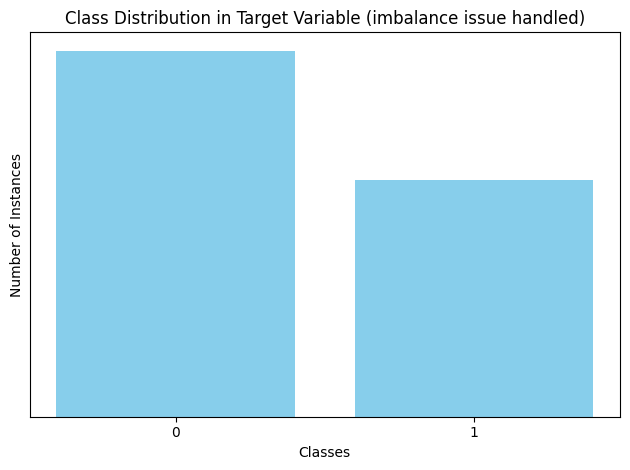

In [12]:
unique_classes, class_counts = np.unique(y_log, return_counts=True)
plt.bar(unique_classes.astype(str), class_counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in Target Variable (imbalance issue handled)')
plt.xticks()
plt.yticks([])
plt.tight_layout()
plt.show()

## *Change Momentum*

* momentum = 0

In [ ]:
# miniBatchSGD
logistic_model_log_mini1 = pj.LogisticRegression(
    boundary=0.5,
    num_epochs=50,
    lr=1e-1,  # Adjusted learning rate
    lr_decay=0,
    momentum=0,
    use_miniBatch=True,
)
# mini batch
split_ratio = [80]
batch_sizes = [16]
class_label = [0,1]
tr_mse_mini1, tr_acc_mini1, tr_pre_mini1, tr_recall_mini1, tr_f1_mini1, tst_mse_mini1, tst_acc_mini1, tst_pre_mini1, tst_recall_mini1, tst_f1_mini1, grad_norm_hist_mini1 = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log_mini1, batch_sizes, class_label, linear=False)


* momentum = 0.5

In [ ]:
# miniBatchSGD
logistic_model_log_mini2 = pj.LogisticRegression(
    boundary=0.5,
    num_epochs=50,
    lr=1e-1,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=True,
)
# mini batch
split_ratio = [80]
batch_sizes = [16]
class_label = [0,1]
tr_mse_mini2, tr_acc_mini2, tr_pre_mini2, tr_recall_mini2, tr_f1_mini2, tst_mse_mini2, tst_acc_mini2, tst_pre_mini2, tst_recall_mini2, tst_f1_mini2, grad_norm_hist_mini2 = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log_mini2, batch_sizes, class_label, linear=False)


* momentum = 0.9

In [ ]:
# miniBatchSGD
logistic_model_log_mini3 = pj.LogisticRegression(
    boundary=0.5,
    num_epochs=50,
    lr=1e-1,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.9,
    use_miniBatch=True,
)
# mini batch
split_ratio = [80]
batch_sizes = [16]
class_label = [0,1]
tr_mse_mini3, tr_acc_mini3, tr_pre_mini3, tr_recall_mini3, tr_f1_mini3, tst_mse_mini3, tst_acc_mini3, tst_pre_mini3, tst_recall_mini3, tst_f1_mini3, grad_norm_hist_mini3 = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log_mini3, batch_sizes, class_label, linear=False)


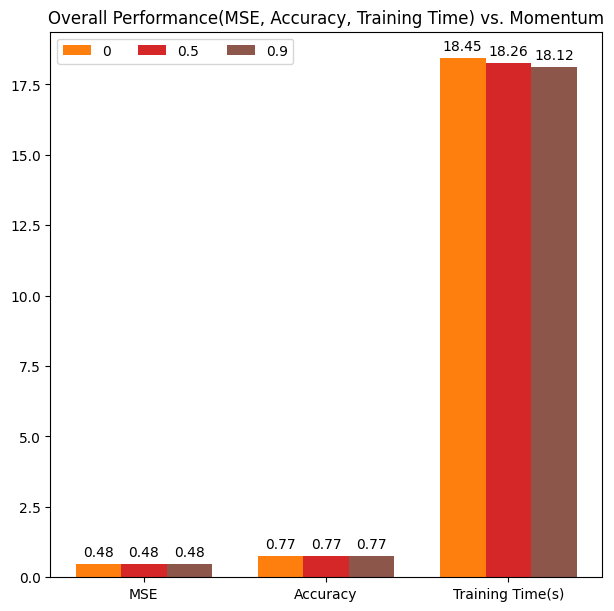

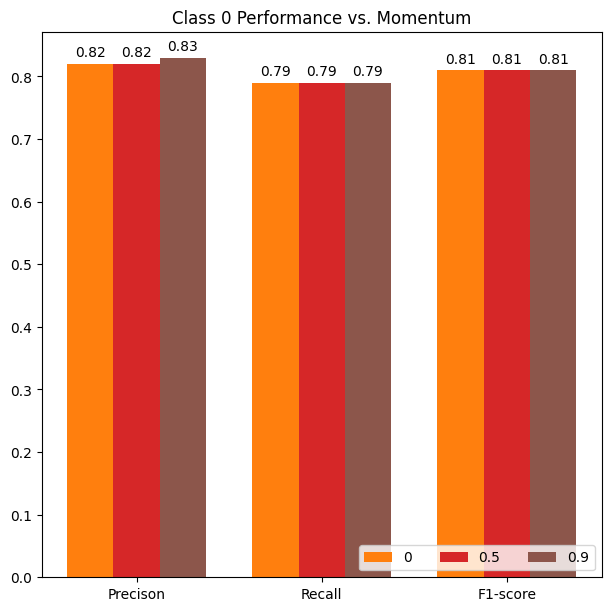

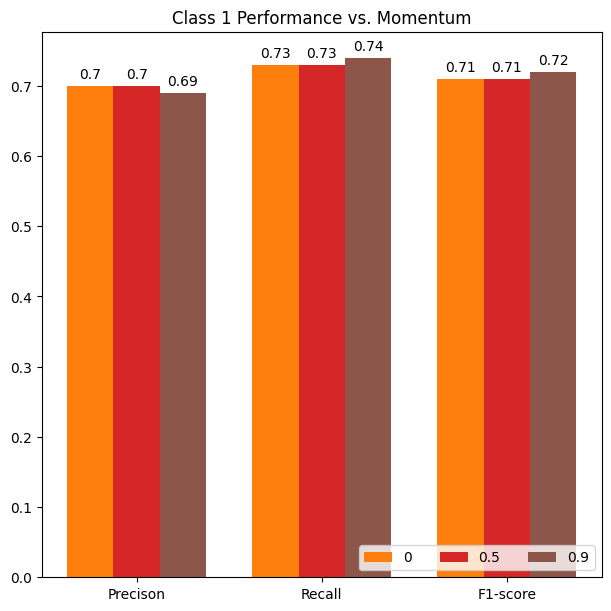

In [78]:
momentums = [0, 0.5, 0.9]
x_name = "Momentum"
bar_label = ["0", "0.5", "0.9"]
location = 'lower right'

mse = [tr_mse_mini1[0], tr_mse_mini2[0], tr_mse_mini3[0]]
accuracy = [tr_acc_mini1[0], tr_acc_mini2[0], tr_acc_mini3[0]]
time_mtm = [logistic_model_log_mini1.time_hist[0], logistic_model_log_mini2.time_hist[0], logistic_model_log_mini3.time_hist[0]]
perform_all = [mse, accuracy, time_mtm]
x_label1 = ["MSE", "Accuracy", "Training Time(s)"]
y_name1 = 'Overall Performance(MSE, Accuracy, Training Time)'

class0_pre = [tr_pre_mini1[0][0], tr_pre_mini2[0][0], tr_pre_mini3[0][0]]
class0_recall = [tr_recall_mini1[0][0], tr_recall_mini2[0][0], tr_recall_mini3[0][0]]
class0_f1 = [tr_f1_mini1[0][0], tr_f1_mini2[0][0], tr_f1_mini3[0][0]]
perform_0 = [class0_pre, class0_recall, class0_f1]
x_label = ["Precison", "Recall", "F1-score"]
y_name2 = 'Class 0 Performance'

class1_pre = [tr_pre_mini1[0][1], tr_pre_mini2[0][1], tr_pre_mini3[0][1]]
class1_recall = [tr_recall_mini1[0][1], tr_recall_mini2[0][1], tr_recall_mini3[0][1]]
class1_f1 = [tr_f1_mini1[0][1], tr_f1_mini2[0][1], tr_f1_mini3[0][1]]
perform_1 = [class1_pre, class1_recall, class1_f1]
y_name3 = 'Class 1 Performance'

plot_bar_perform(perform_all, x_label1, x_name, "", y_name1, bar_label, width=0.25, x_range1=6, x_range2=6, round_to=2, odd=True)
plot_bar_perform(perform_0, x_label, x_name, "", y_name2, bar_label, width=0.25, x_range1=6, x_range2=6, round_to=2, odd=True, leg_loc=location)
plot_bar_perform(perform_1, x_label, x_name, "", y_name3, bar_label, width=0.25, x_range1=6, x_range2=6, round_to=2, odd=True, leg_loc=location)


## **How cam imbalanced data influnce model's performance**
We will be using un-preprocessed data, from dataset two, to see how the model performs if class distribution is highly imbalanced

In [ ]:
# miniBatchSGD
logistic_model_log_mini_raw = pj.LogisticRegression(
    boundary=0.5,
    num_epochs=50,
    lr=1e-1,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=True,
)
# mini batch
split_ratio = [80]
batch_sizes = [16]
class_label = [0,1]
tr_mse_mini_raw, tr_acc_mini_raw, tr_pre_mini_raw, tr_recall_mini_raw, tr_f1_mini_raw, tst_mse_mini_raw, tst_acc_mini_raw, tst_pre_mini_raw, tst_recall_mini_raw, tst_f1_mini_raw, grad_norm_hist_mini_raw = pj.size_vs_performance(X_scaled_log_raw, y_log_raw, split_ratio, logistic_model_log_mini_raw, batch_sizes, class_label, linear=False)


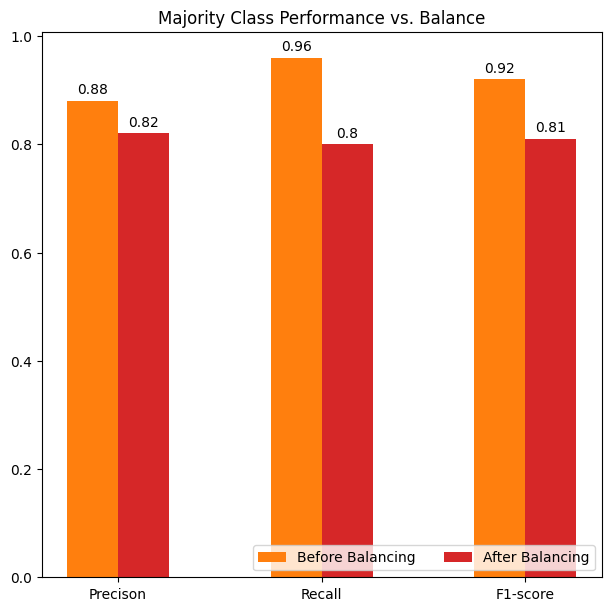

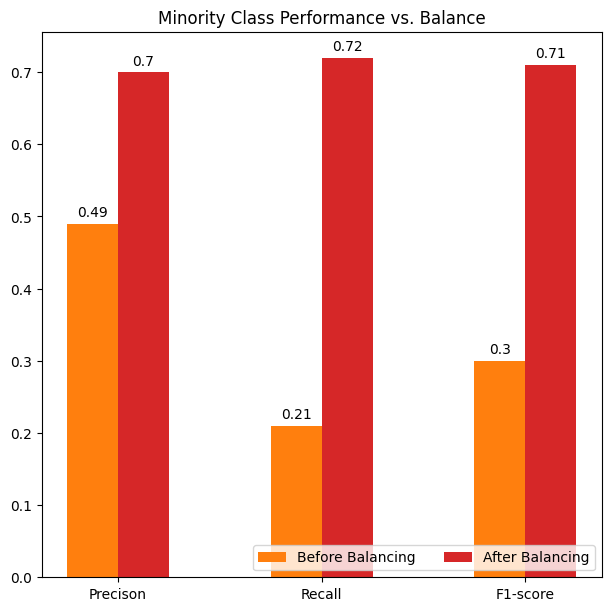

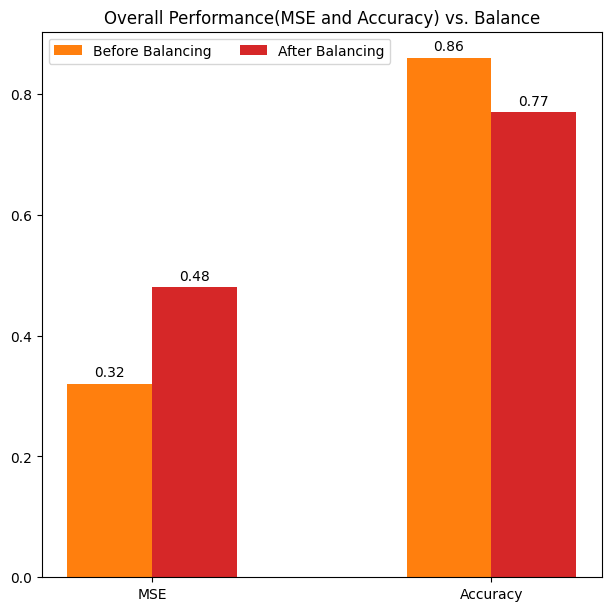

In [10]:
x_name = "Balance"
bar_label = ["Before Balancing", "After Balancing"]
location = 'lower right'

mse_b = [tr_mse_mini_raw[0], tr_mse_mini2[0]]
accuracy_b = [tr_acc_mini_raw[0], tr_acc_mini2[0]]
perform_all_b = [mse_b, accuracy_b]
x_label1 = ["MSE", "Accuracy"]
y_name1 = 'Overall Performance(MSE and Accuracy)'

class0_pre_b = [tr_pre_mini_raw[0][0], tr_pre_mini2[0][0]]
class0_recall_b = [tr_recall_mini_raw[0][0], tr_recall_mini2[0][0]]
class0_f1_b = [tr_f1_mini_raw[0][0], tr_f1_mini2[0][0]]
perform_0_b = [class0_pre_b, class0_recall_b, class0_f1_b]
x_label = ["Precison", "Recall", "F1-score"]
y_name2 = 'Majority Class Performance'

class1_pre_b = [tr_pre_mini_raw[0][1], tr_pre_mini2[0][1]]
class1_recall_b = [tr_recall_mini_raw[0][1], tr_recall_mini2[0][1]]
class1_f1_b = [tr_f1_mini_raw[0][1], tr_f1_mini2[0][1]]
perform_1_b = [class1_pre_b, class1_recall_b, class1_f1_b]
y_name3 = 'Minority Class Performance'

plot_bar_perform(perform_0_b, x_label, x_name, "", y_name2, bar_label, width=0.25, x_range1=6, x_range2=6, round_to=2, odd=False, leg_loc=location, two_bar=True)
plot_bar_perform(perform_1_b, x_label, x_name, "", y_name3, bar_label, width=0.25, x_range1=6, x_range2=6, round_to=2, odd=False, leg_loc=location, two_bar=True)
plot_bar_perform(perform_all_b, x_label1, x_name, "", y_name1, bar_label, width=0.25, x_range1=6, x_range2=6, round_to=2, odd=False, two_bar=True)


In [ ]:
# miniBatchSGD
logistic_model_log_bd1 = pj.LogisticRegression(
    boundary=0.4,
    num_epochs=50,
    lr=1e-1,  # Adjusted learning rate
    lr_decay=0,
    momentum=0,
    use_miniBatch=True,
)
# mini batch
split_ratio = [80]
batch_sizes = [16]
class_label = [0,1]
tr_mse_bd1, tr_acc_bd1, tr_pre_bd1, tr_recall_bd1, tr_f1_bd1, tst_mse_bd1, tst_acc_bd1, tst_pre_bd1, tst_recall_bd1, tst_f1_bd1, grad_norm_hist_bd1 = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log_bd1, batch_sizes, class_label, linear=False)


In [ ]:
# miniBatchSGD
logistic_model_log_bd2 = pj.LogisticRegression(
    boundary=0.6,
    num_epochs=50,
    lr=1e-1,  # Adjusted learning rate
    lr_decay=0,
    momentum=0,
    use_miniBatch=True,
)
# mini batch
split_ratio = [80]
batch_sizes = [16]
class_label = [0,1]
tr_mse_bd2, tr_acc_bd2, tr_pre_bd2, tr_recall_bd2, tr_f1_bd2, tst_mse_bd2, tst_acc_bd2, tst_pre_bd2, tst_recall_bd2, tst_f1_bd2, grad_norm_hist_bd2 = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log_bd2, batch_sizes, class_label, linear=False)


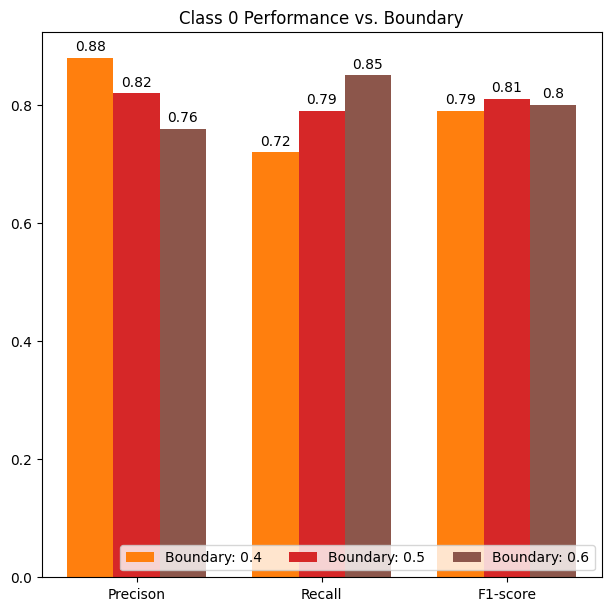

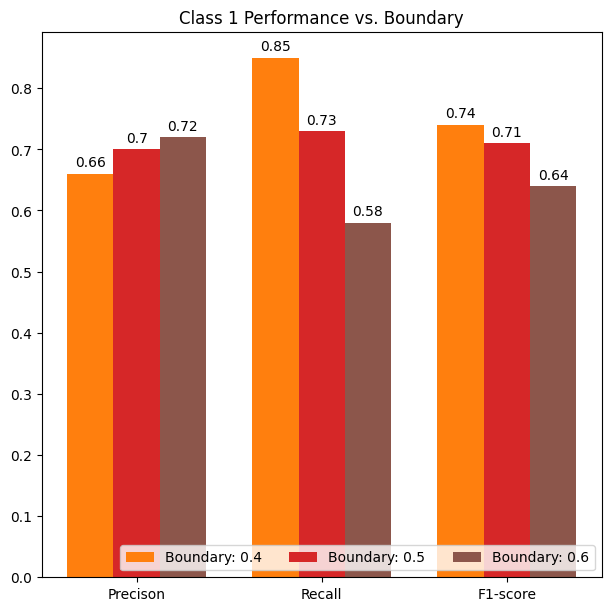

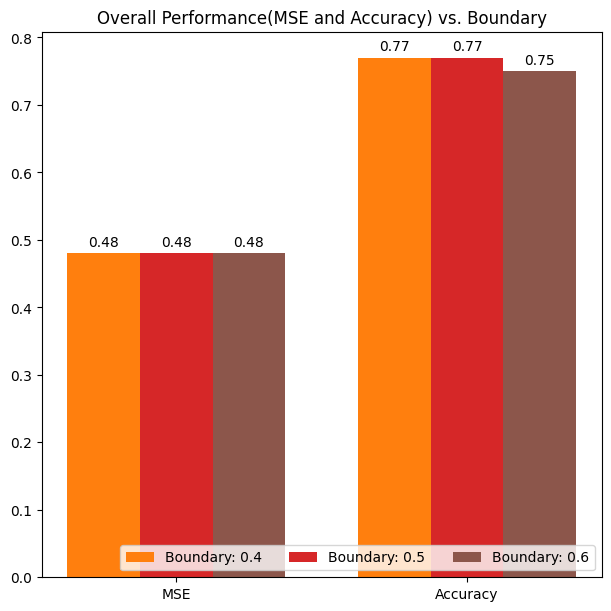

In [79]:
x_name_bd = "Boundary"
bar_label_bd = ["Boundary: 0.4", "Boundary: 0.5", "Boundary: 0.6"]
location = 'lower right'

mse_bd = [tr_mse_bd1[0], tr_mse_mini1[0], tr_mse_bd2[0]]
accuracy_bd = [tr_acc_bd1[0], tr_acc_mini1[0], tr_acc_bd2[0]]
perform_all_bd = [mse_bd, accuracy_bd]
x_label_bd = ["MSE", "Accuracy"]
y_name1_bd = 'Overall Performance(MSE and Accuracy)'

class0_pre_bd = [tr_pre_bd1[0][0], tr_pre_mini1[0][0], tr_pre_bd2[0][0]]
class0_recall_bd = [tr_recall_bd1[0][0], tr_recall_mini1[0][0], tr_recall_bd2[0][0]]
class0_f1_bd = [tr_f1_bd1[0][0], tr_f1_mini1[0][0], tr_f1_bd2[0][0]]
perform_0_bd = [class0_pre_bd, class0_recall_bd, class0_f1_bd]
x_label_bd1 = ["Precison", "Recall", "F1-score"]
y_name2_bd = 'Class 0 Performance'

class1_pre_bd = [tr_pre_bd1[0][1], tr_pre_mini1[0][1], tr_pre_bd2[0][1]]
class1_recall_bd = [tr_recall_bd1[0][1], tr_recall_mini1[0][1], tr_recall_bd2[0][1]]
class1_f1_bd = [tr_f1_bd1[0][1], tr_f1_mini1[0][1], tr_f1_bd2[0][1]]
perform_1_bd = [class1_pre_bd, class1_recall_bd, class1_f1_bd]
y_name3_bd = 'Class 1 Performance'

plot_bar_perform(perform_0_bd, x_label_bd1, x_name_bd, "", y_name2_bd, bar_label_bd, width=0.25, x_range1=6, x_range2=6, round_to=2, odd=True, leg_loc=location, two_bar=False)
plot_bar_perform(perform_1_bd, x_label_bd1, x_name_bd, "", y_name3_bd, bar_label_bd, width=0.25, x_range1=6, x_range2=6, round_to=2, odd=True, leg_loc=location, two_bar=False)
plot_bar_perform(perform_all_bd, x_label_bd, x_name_bd, "", y_name1_bd, bar_label_bd, width=0.25, x_range1=6, x_range2=6, round_to=2, odd=True, leg_loc=location, two_bar=False)


In [ ]:
# miniBatchSGD
logistic_model_log_bd_raw1 = pj.LogisticRegression(
    boundary=0.4,
    num_epochs=50,
    lr=1e-1,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=True,
)
# mini batch
split_ratio = [80]
batch_sizes = [16]
class_label = [0,1]
tr_mse_bd_raw1, tr_acc_bd_raw1, tr_pre_bd_raw1, tr_recall_bd_raw1, tr_f1_bd_raw1, tst_mse_bd_raw1, tst_acc_bd_raw1, tst_pre_bd_raw1, tst_recall_bd_raw1, tst_f1_bd_raw1, grad_norm_hist_bd_raw1 = pj.size_vs_performance(X_scaled_log_raw, y_log_raw, split_ratio, logistic_model_log_bd_raw1, batch_sizes, class_label, linear=False)


In [ ]:
# miniBatchSGD
logistic_model_log_bd_raw2 = pj.LogisticRegression(
    boundary=0.6,
    num_epochs=50,
    lr=1e-1,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=True,
)
# mini batch
split_ratio = [80]
batch_sizes = [16]
class_label = [0,1]
tr_mse_bd_raw2, tr_acc_bd_raw2, tr_pre_bd_raw2, tr_recall_bd_raw2, tr_f1_bd_raw2, tst_mse_bd_raw2, tst_acc_bd_raw2, tst_pre_bd_raw2, tst_recall_bd_raw2, tst_f1_bd_raw2, grad_norm_hist_bd_raw2 = pj.size_vs_performance(X_scaled_log_raw, y_log_raw, split_ratio, logistic_model_log_bd_raw2, batch_sizes, class_label, linear=False)


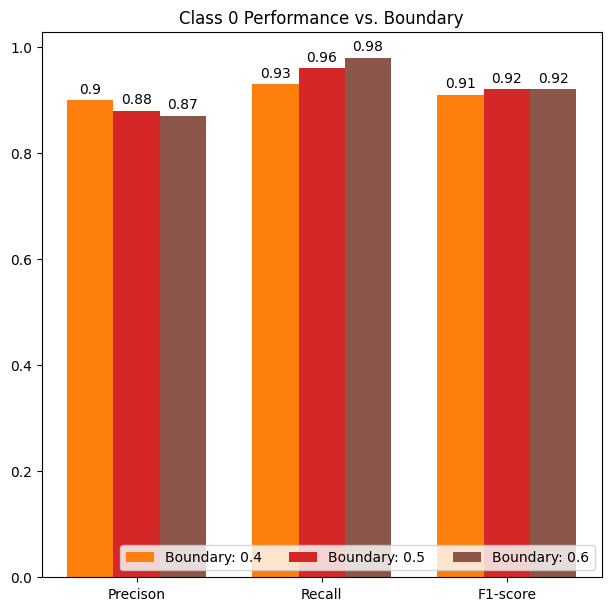

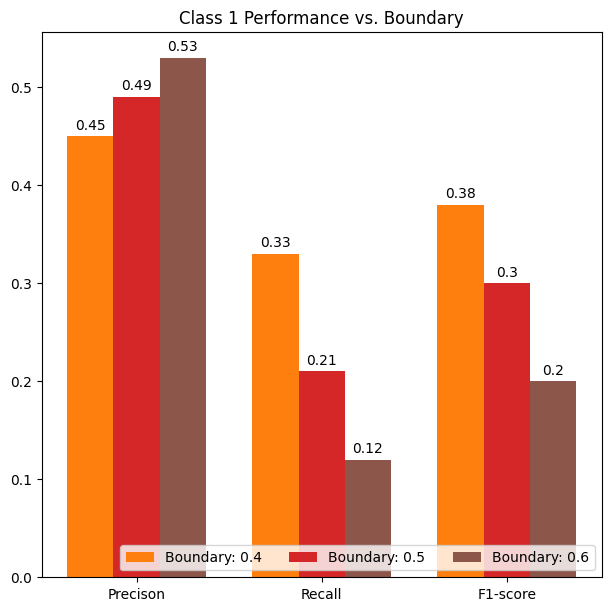

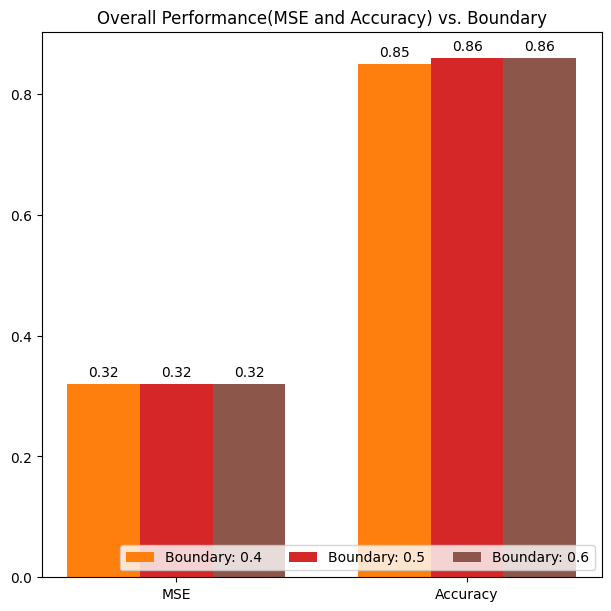

In [80]:
x_name_bd = "Boundary"
bar_label_bd = ["Boundary: 0.4", "Boundary: 0.5", "Boundary: 0.6"]
location = 'lower right'

mse_bd_raw = [tr_mse_bd_raw1[0], tr_mse_mini_raw[0], tr_mse_bd_raw2[0]]
accuracy_bd_raw = [tr_acc_bd_raw1[0], tr_acc_mini_raw[0], tr_acc_bd_raw2[0]]
perform_all_bd_raw = [mse_bd_raw, accuracy_bd_raw]
x_label_bd_raw = ["MSE", "Accuracy"]
y_name1_bd_raw = 'Overall Performance(MSE and Accuracy)'

class0_pre_bd_raw = [tr_pre_bd_raw1[0][0], tr_pre_mini_raw[0][0], tr_pre_bd_raw2[0][0]]
class0_recall_bd_raw = [tr_recall_bd_raw1[0][0], tr_recall_mini_raw[0][0], tr_recall_bd_raw2[0][0]]
class0_f1_bd_raw = [tr_f1_bd_raw1[0][0], tr_f1_mini_raw[0][0], tr_f1_bd_raw2[0][0]]
perform_0_bd_raw = [class0_pre_bd_raw, class0_recall_bd_raw, class0_f1_bd_raw]
x_label_bd1_raw = ["Precison", "Recall", "F1-score"]
y_name2_bd_raw = 'Class 0 Performance'

class1_pre_bd_raw = [tr_pre_bd_raw1[0][1], tr_pre_mini_raw[0][1], tr_pre_bd_raw2[0][1]]
class1_recall_bd_raw = [tr_recall_bd_raw1[0][1], tr_recall_mini_raw[0][1], tr_recall_bd_raw2[0][1]]
class1_f1_bd_raw = [tr_f1_bd_raw1[0][1], tr_f1_mini_raw[0][1], tr_f1_bd_raw2[0][1]]
perform_1_bd_raw = [class1_pre_bd_raw, class1_recall_bd_raw, class1_f1_bd_raw]
y_name3_bd_raw = 'Class 1 Performance'

plot_bar_perform(perform_0_bd_raw, x_label_bd1_raw, x_name_bd, "", y_name2_bd_raw, bar_label_bd, width=0.25, x_range1=6, x_range2=6, round_to=2, odd=True, leg_loc=location, two_bar=False)
plot_bar_perform(perform_1_bd_raw, x_label_bd1_raw, x_name_bd, "", y_name3_bd_raw, bar_label_bd, width=0.25, x_range1=6, x_range2=6, round_to=2, odd=True, leg_loc=location, two_bar=False)
plot_bar_perform(perform_all_bd_raw, x_label_bd, x_name_bd, "", y_name1_bd_raw, bar_label_bd, width=0.25, x_range1=6, x_range2=6, round_to=2, odd=True, leg_loc=location, two_bar=False)
